## Models
The objective of this notebook is to train and test several regression models with our pre-processed data, extracted in the pre-processing file.
The predictions are then saved in .csv format.

#### imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv("data_train_base.csv",index_col=0)

In [3]:
y = pd.read_csv("labels_train_base.csv",index_col=0)

In [4]:
X_test = pd.read_csv("data_test_base.csv",index_col=0)
X_test.head()

,additional_heat_generators,additional_water_heaters,altitude,area_code,building_height_ft,building_total_area_sqft,building_use_type_code,consumption_measurement_date,has_balcony,has_air_conditioning,...,building_period_2006-2012,building_period_inf_1948,building_period_sup_2012,is_crossing_building_crossing_east_west,is_crossing_building_crossing_north_south,is_crossing_building_not_through,is_crossing_building_through_90,is_crossing_building_through_all_way,window_orientation_other,window_orientation_sud
level_0,,,,,,,,,,,,,,,,,,,,,
1371914,0,0,249.34384,615,19.685040,581.2506,1,2019,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
618756,0,0,104.98688,304,28.215224,721.1813,1,2019,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
871032,0,0,72.17848,204,25.918636,699.6535,1,2016,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1430640,1,0,800.52496,858,15.748032,1248.6124,1,2015,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
86306,1,0,1010.49872,671,0.000000,1345.4875,1,2015,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [5]:
X.head()

,additional_heat_generators,additional_water_heaters,altitude,area_code,building_height_ft,building_total_area_sqft,building_use_type_code,has_balcony,has_air_conditioning,heating_type,...,building_period_2006-2012,building_period_inf_1948,building_period_sup_2012,is_crossing_building_crossing_east_west,is_crossing_building_crossing_north_south,is_crossing_building_not_through,is_crossing_building_through_90,is_crossing_building_through_all_way,window_orientation_other,window_orientation_sud
level_0,,,,,,,,,,,,,,,,,,,,,
111323,1,0,328.08400,881,13.779528,1291.6680,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
265182,0,0,360.89240,260,43.635172,7136.4657,2,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
927507,0,0,324.80316,573,19.685040,4197.9210,2,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
874620,0,0,288.71392,204,13.779528,1646.8767,1,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
563274,0,0,849.73756,374,19.028872,1033.3344,1,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [6]:
print(len(X.columns), len(X_test.columns))

47 47


In [7]:
X = X.drop(['is_crossing_building_crossing_east_west',
      'is_crossing_building_crossing_north_south', 'is_crossing_building_through_90'], axis=1)

In [8]:
X_test = X_test.drop(['is_crossing_building_crossing_east_west',
      'is_crossing_building_crossing_north_south', 'is_crossing_building_through_90'], axis=1)

#### check missing values

In [9]:
X.dropna(axis=0)

,additional_heat_generators,additional_water_heaters,altitude,area_code,building_height_ft,building_total_area_sqft,building_use_type_code,has_balcony,has_air_conditioning,heating_type,...,building_period_1970-1988,building_period_1989-1999,building_period_2000-2005,building_period_2006-2012,building_period_inf_1948,building_period_sup_2012,is_crossing_building_not_through,is_crossing_building_through_all_way,window_orientation_other,window_orientation_sud
level_0,,,,,,,,,,,,,,,,,,,,,
111323,1,0,328.08400,881,13.779528,1291.668000,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
265182,0,0,360.89240,260,43.635172,7136.465700,2,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
927507,0,0,324.80316,573,19.685040,4197.921000,2,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
874620,0,0,288.71392,204,13.779528,1646.876700,1,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
563274,0,0,849.73756,374,19.028872,1033.334400,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84908,0,1,1591.20740,671,17.060368,1054.862200,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
997676,0,0,688.97640,345,26.246720,2055.904900,2,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
311831,1,0,2805.11820,205,22.637796,2098.960500,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [10]:
y.dropna(axis=0)

,energy_consumption_per_annum
level_0,
111323,290.166345
265182,169.818197
927507,144.499711
874620,158.742715
563274,82.223648
...,...
84908,250.513236
997676,265.278733
311831,311.681103


In [11]:
#X = X.drop(["area_code"],axis=1)
#X_test = X_test.drop(["area_code"],axis=1)

In [12]:
X = X.drop(["building_type_shopping_centres","nb_commercial_units", "consumption_measurement_date"],axis=1)
X_test = X_test.drop(["building_type_shopping_centres","nb_commercial_units", "consumption_measurement_date"],axis=1)

In [13]:
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import cross_val_score

In [14]:
X_test.columns

Index(['additional_heat_generators', 'additional_water_heaters', 'altitude',
       'area_code', 'building_height_ft', 'building_total_area_sqft',
       'building_use_type_code', 'has_balcony', 'has_air_conditioning',
       'heating_type', 'living_area_sqft', 'lowe_floor_thermal_conductivity',
       'nb_dwellings', 'outer_wall_thermal_conductivity',
       'percentage_glazed_surfaced', 'upper_floor_thermal_conductivity',
       'window_heat_retention_factor', 'window_thermal_conductivity',
       'outer_wall_thickness', 'radon_risk_level', 'renewable_energy_sources',
       'thermal_inertia', 'wall_insulation_type', 'building_category_other',
       'building_category_condo', 'building_category_individual_house',
       'building_type_flat', 'building_type_house',
       'building_type_multiple_dwellings', 'building_type_Non_residential',
       'building_period_1949-1970', 'building_period_1970-1988',
       'building_period_1989-1999', 'building_period_2000-2005',
       'building

In [15]:
X.columns 

Index(['additional_heat_generators', 'additional_water_heaters', 'altitude',
       'area_code', 'building_height_ft', 'building_total_area_sqft',
       'building_use_type_code', 'has_balcony', 'has_air_conditioning',
       'heating_type', 'living_area_sqft', 'lowe_floor_thermal_conductivity',
       'nb_dwellings', 'outer_wall_thermal_conductivity',
       'percentage_glazed_surfaced', 'upper_floor_thermal_conductivity',
       'window_heat_retention_factor', 'window_thermal_conductivity',
       'outer_wall_thickness', 'radon_risk_level', 'renewable_energy_sources',
       'thermal_inertia', 'wall_insulation_type', 'building_category_other',
       'building_category_condo', 'building_category_individual_house',
       'building_type_flat', 'building_type_house',
       'building_type_multiple_dwellings', 'building_type_Non_residential',
       'building_period_1949-1970', 'building_period_1970-1988',
       'building_period_1989-1999', 'building_period_2000-2005',
       'building

### Linear Regression (simple and poor performance model)

In [16]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
cross_val_score(clf, X, y, cv=5, scoring='explained_variance')

array([0.36327427, 0.36779168, 0.36507872, 0.36298427, 0.36400214])

### XGBoost model

In [18]:
import xgboost as xgb

In [19]:
# cross validation of XGBoost Regressor algo
xgb_model = xgb.XGBRegressor(random_state=42)
scores = cross_val_score(xgb_model, X, y, scoring="explained_variance", cv=5, verbose=2, n_jobs=-1)
scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


[CV] END .................................................... total time= 5.0min
[CV] END .................................................... total time= 5.1min
[CV] END .................................................... total time= 5.1min


[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  5.1min remaining:  3.4min


[CV] END .................................................... total time= 5.1min
[CV] END .................................................... total time= 5.1min


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.2min finished


array([0.59923034, 0.60292209, 0.59766963, 0.59990688, 0.5948075 ])

In [ ]:
# fit the regressor
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X, y)

In [ ]:
X_test = X_test[X.columns]

In [ ]:
y_pred = xgb_model.predict(X_test)
y_pred

In [ ]:
# predictions for submission
y_sub = pd.DataFrame({'level_0':X_test.index, 
                      "energy_consumption_per_annum":y_pred}).set_index('level_0')
y_sub

In [ ]:
y_sub.to_csv("last_try.csv")

In [ ]:
xgb_model.save_model("model_last.json")

#### Model explainability

<BarContainer object of 40 artists>

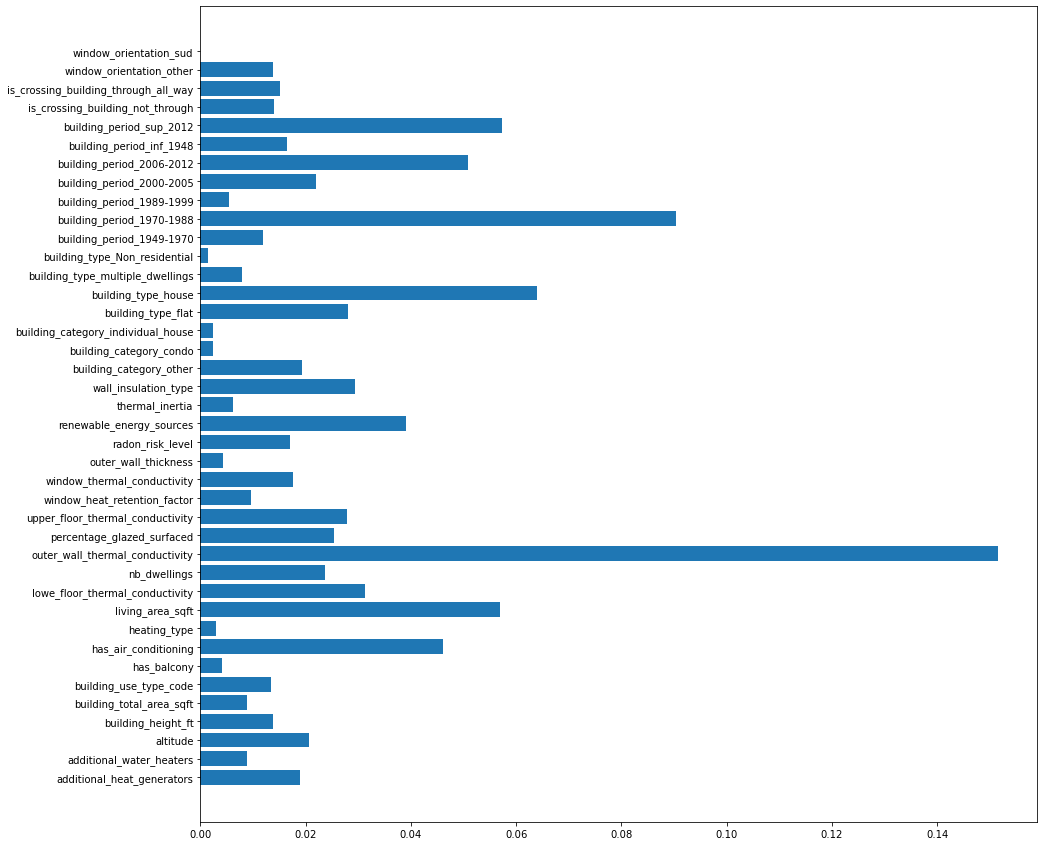

In [25]:
plt.figure(figsize=(15,15))
plt.barh(X.columns, xgb_model.feature_importances_)

In [26]:
import shap

In [27]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


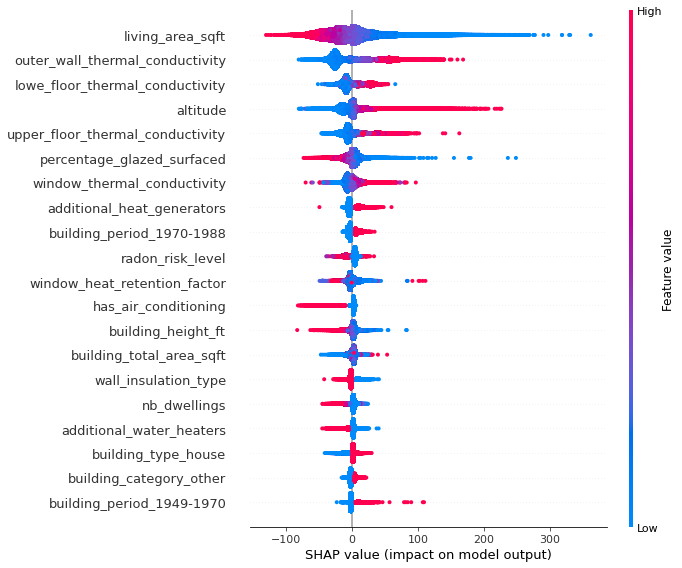

In [28]:
shap.summary_plot(shap_values, X_test)

### XGBRegressor

In [26]:
# cross validation of XGBoost Regressor algo
xgb_model_param = xgb.XGBRegressor(random_state=0, sampling_method="gradient_based")
scores = cross_val_score(xgb_model, X, y, scoring="explained_variance", cv=5, verbose=2, n_jobs=-1)
scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


[CV] END .................................................... total time= 5.7min
[CV] END .................................................... total time= 5.7min
[CV] END .................................................... total time= 5.7min


[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  5.7min remaining:  3.8min


[CV] END .................................................... total time= 5.7min
[CV] END .................................................... total time= 5.7min


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.8min finished


array([0.55696129, 0.55986211, 0.55555203, 0.55871069, 0.55545886])

### XGBRFRegressor

In [43]:
# cross validation of XGBoost Regressor algo
xgb_rf_model = xgb.XGBRFRegressor(random_state=42)
scores = cross_val_score(xgb_rf_model, X, y, scoring="explained_variance", cv=5, verbose=2, n_jobs=-1)
scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


[CV] END .................................................... total time= 3.9min
[CV] END .................................................... total time= 4.0min
[CV] END .................................................... total time= 4.0min


[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  4.0min remaining:  2.7min


[CV] END .................................................... total time= 4.0min
[CV] END .................................................... total time= 4.0min


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.0min finished


array([0.40619798, 0.40797114, 0.40435157, 0.40866112, 0.40530691])

In [44]:
# fit the regressor
xgb_rf_model = xgb.XGBRFRegressor(random_state=42)
xgb_rf_model.fit(X, y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=42,
               reg_alpha=None, ...)

In [45]:
y_pred = xgb_rf_model.predict(X_test)
y_pred

array([225.1549 , 264.26126, 302.69757, ..., 311.7062 , 177.91518,
       179.66371], dtype=float32)

In [46]:
# predictions for submission
y_sub = pd.DataFrame({'level_0':X_test.index, 
                      "energy_consumption_per_annum":y_pred}).set_index('level_0')
y_sub

,energy_consumption_per_annum
level_0,
1371914,225.154907
618756,264.261261
871032,302.697571
1430640,178.648071
86306,196.720612
...,...
845834,354.334473
279675,177.545807
811813,311.706207


In [ ]:
y_sub.to_csv("third_try.csv")

### Test on hyperparameters tuning

In [33]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [38]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 7, 10]}
        #'min_child_weight': [1, 3, 5],
        #'n_estimators' : [100, 200, 500]}
    xgb_model = xgb.XGBRegressor()
    gsearch = RandomizedSearchCV(estimator = xgb_model,
                               param_distributions = param_tuning, n_iter = 5,                        
                               scoring = 'explained_variance', #score explained variance
                               cv = 5,
                               n_jobs = -1,
                               verbose = 2)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [39]:
params = hyperParameterTuning(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200; total time=27.5min
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200; total time=27.8min
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200; total time=27.8min
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200; total time=27.8min
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200; total time=27.8min
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200; total time=27.9min
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time= 5.8min
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time= 5.9min
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time= 6.2min
[CV] END learning_rate=0.1, max_depth=3, min_child_w


KeyboardInterrupt



In [ ]:
# fit with the found parameters
model_tune = xgb.XGBRegressor(params=params)
model_tune.fit(X, y)

In [ ]:
y_pred = xgb_model.predict(X_test)
y_pred